In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Find missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

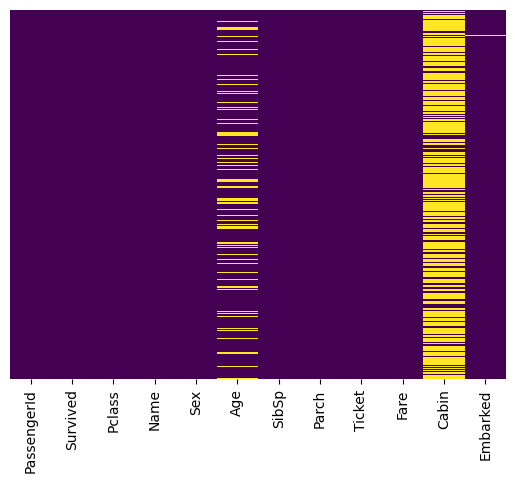

In [7]:
#Missing values visualization
sns.heatmap(df.isnull(), yticklabels=False,cbar = False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

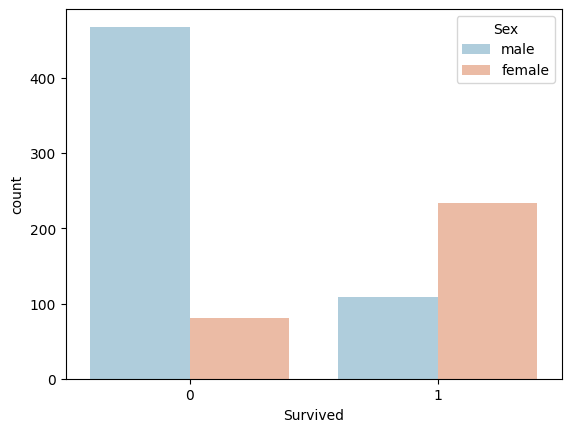

In [8]:
#Plot of sex based survived
sns.countplot(x = 'Survived',hue = 'Sex', data = df,palette = 'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

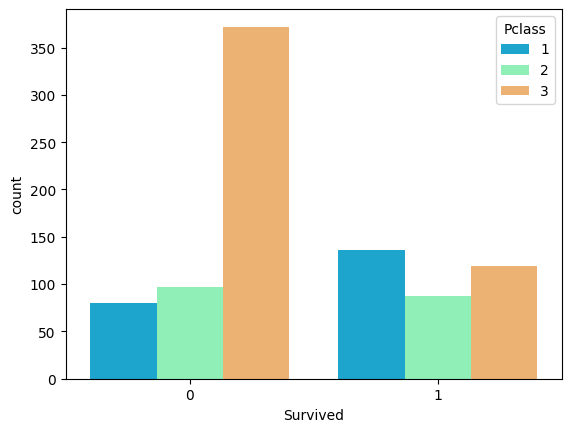

In [9]:
sns.countplot(x = 'Survived',hue = 'Pclass', data = df,palette = 'rainbow')

<Axes: >

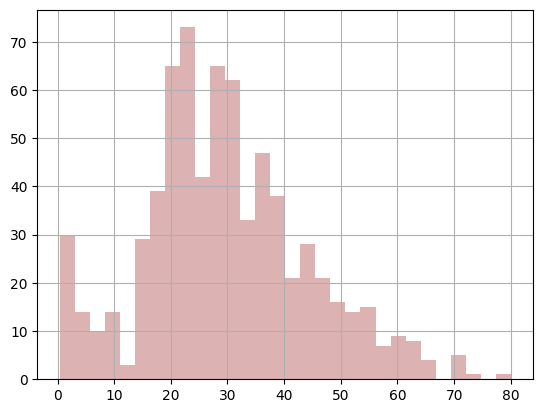

In [10]:
df['Age'].hist(bins =30,color = 'darkred',alpha = 0.3)

<Axes: xlabel='SibSp', ylabel='count'>

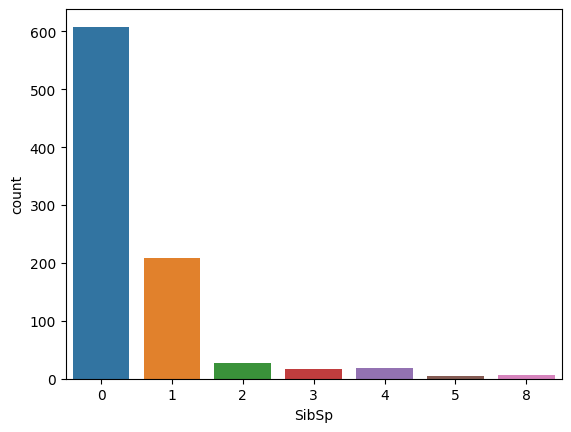

In [11]:
sns.countplot(x = 'SibSp',data = df)

Maximum number of people who don't have sibling or spouse.

<Axes: >

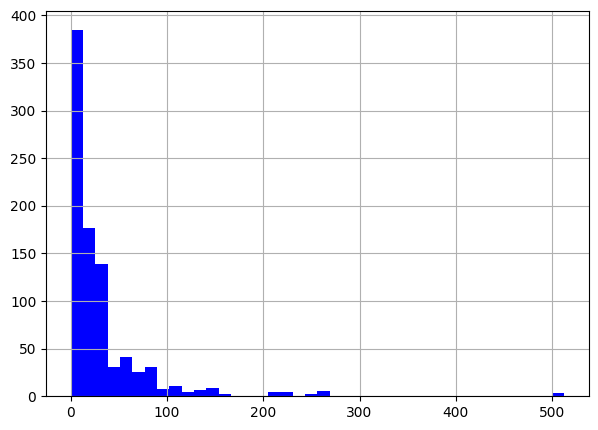

In [12]:
df['Fare'].hist(color = 'blue',bins = 40,figsize = (7,5))

### Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

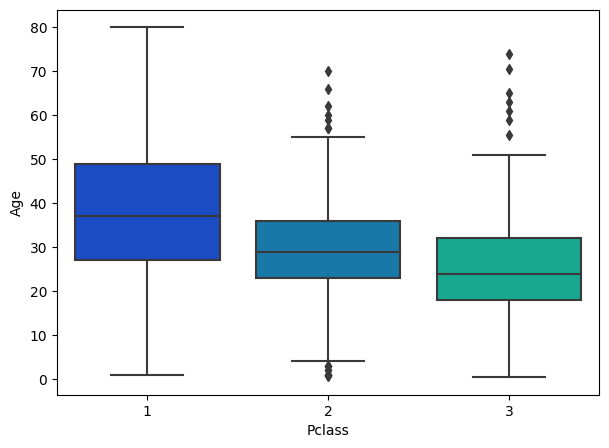

In [13]:
plt.figure(figsize = (7,5))
sns.boxplot(x = 'Pclass',y = 'Age',data = df,palette = 'winter')

We can see that wealthier passangers which is in class 1 are older than class 2 and class 3. We will use these average value to impute based on Pclass for Age

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
    
    else:
        return Age

In [15]:
df['Age'] = df[['Age' ,'Pclass']].apply(impute_age,axis = 1)

In [16]:
df['Age'].isnull().sum()

0

In [17]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Here, We can see that there is categorical value in cabin and also nan value present in the Cabin features. SO first we have to remove missing values and then perform encoding

In [18]:
df['Cabin'].fillna('Missing', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


In [19]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [20]:
df['Cabin'].head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [21]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [22]:
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [23]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [24]:
prob_df['Died'] = 1 - prob_df['Survived']

In [25]:
prob_df['Probability_Ratio'] = prob_df['Survived']/prob_df['Died']

In [26]:
probability_encoded = prob_df['Probability_Ratio'].to_dict()

In [27]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.428274
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1.458333
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.428274
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1.458333
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.428274


In [28]:
#PassengerId,Name,Cabin is not required. So we can drop them.
df.drop(['Cabin','PassengerId','Ticket','Name'],axis = 1, inplace = True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_encoded
0,0,3,male,22.0,1,0,7.2500,S,0.428274
1,1,1,female,38.0,1,0,71.2833,C,1.458333
2,1,3,female,26.0,0,0,7.9250,S,0.428274
3,1,1,female,35.0,1,0,53.1000,S,1.458333
4,0,3,male,35.0,0,0,8.0500,S,0.428274


Now, Only Sex and Embarked are categorical features. So we have to perform one hot encoding

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
#There is only 2 record is missing in large dataset. So we can drop that as it will not impact on our data
df.dropna(subset=['Embarked'], inplace=True)

In [32]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [33]:
df.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_encoded    0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [34]:
df['Sex_male'] = pd.get_dummies(df['Sex'],drop_first=True)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_encoded,Embarked_Q,Embarked_S,Sex_male
0,0,3,male,22.0,1,0,7.2500,0.428274,0,1,1
1,1,1,female,38.0,1,0,71.2833,1.458333,0,0,0
2,1,3,female,26.0,0,0,7.9250,0.428274,0,1,0
3,1,1,female,35.0,1,0,53.1000,1.458333,0,1,0
4,0,3,male,35.0,0,0,8.0500,0.428274,0,1,1


In [36]:
#We can drop the Sex column as we have performed one hot encoding
df.drop(['Sex'],axis = 1,inplace = True)

In [37]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_encoded,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0.428274,0,1,1
1,1,1,38.0,1,0,71.2833,1.458333,0,0,0
2,1,3,26.0,0,0,7.9250,0.428274,0,1,0
3,1,1,35.0,1,0,53.1000,1.458333,0,1,0
4,0,3,35.0,0,0,8.0500,0.428274,0,1,1


In [38]:
df.isnull().sum()

Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_encoded    0
Embarked_Q       0
Embarked_S       0
Sex_male         0
dtype: int64

So we can see that there is no missing value is available and also our data is ready to perform model

In [39]:
#Spli the data set
x = df.drop(columns = ['Survived']) # Independent Variable
y = df['Survived'] # Dependent Variable

In [40]:
#Train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
skc = StandardScaler()
X_train_skc = skc.fit_transform(X_train)
X_test_skc = skc.transform(X_test)

In [42]:
#Perform Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_skc, y_train)
y_pred = log_reg.predict(X_test_skc)

In [44]:
accuracy_score(y_pred, y_test)

0.7827715355805244

In [45]:
confusion_matrix(y_pred, y_test)

array([[132,  33],
       [ 25,  77]], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
print(auc(fpr,tpr))

0.7703821656050956


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       165
           1       0.70      0.75      0.73       102

    accuracy                           0.78       267
   macro avg       0.77      0.78      0.77       267
weighted avg       0.79      0.78      0.78       267



In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train_skc, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [49]:
y_pred_val = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7827715355805244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc,X = X_train_skc, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.95 %
Standard Deviation: 4.54 %
